In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from text_utils import remove_duplicate_description_information, text_cleaner

X_test = pd.read_csv("X_test.csv", index_col=0)
X_train = pd.read_csv("X_train.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
df = pd.merge(X_train, y_train, left_index=True, right_index=True)

In [2]:
def text_pre_processing(df):
    text_utils.text_cleaner(df)

In [10]:
df = text_cleaner(df)
df.head(3)

cleaned text columns


,designation,description,productid,imageid,prdtypecode,designation_cleaned,description_cleaned,designation_org_clean,designation_spaces,designation_upper,...,designation_encoding_issue,designation_control_chars,description_org_clean,description_spaces,description_upper,description_lower,description_html_tag,description_html_entity,description_encoding_issue,description_control_chars
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [11]:
df.description = df.description_cleaned
df.designation = df.designation_cleaned

In [12]:
df.isna().sum()

designation                   0
description                   0
productid                     0
imageid                       0
prdtypecode                   0
designation_cleaned           0
description_cleaned           0
designation_org_clean         0
designation_spaces            0
designation_upper             0
designation_lower             0
designation_html_tag          0
designation_html_entity       0
designation_encoding_issue    0
designation_control_chars     0
description_org_clean         0
description_spaces            0
description_upper             0
description_lower             0
description_html_tag          0
description_html_entity       0
description_encoding_issue    0
description_control_chars     0
dtype: int64

In [27]:
# store information if description is provided
df['bool_description'] = df['description'].notnull().astype(int)

In [ ]:
df = remove_duplicate_description_information(df)

In [25]:
df['merged_text'] = df['designation'].fillna('') + df['description'].fillna('')

In [29]:
df.loc[df['bool_description'] == 0]

,designation,description,productid,imageid,prdtypecode,designation_cleaned,description_cleaned,designation_org_clean,designation_spaces,designation_upper,...,description_html_entity,description_encoding_issue,description_control_chars,bool_description,designation_empty,description_empty,identical_original,identical_cleaned,text_merged,merged_text
90,Idrasoft 5600 SXT - 30 L de marque Idrania - C...,NaN,2050109964,1123155510,2583,Idrasoft 5600 SXT - 30 L de marque Idrania - C...,Idrasoft 5600 SXT - 30 L de Idrania - Adouciss...,True,False,False,...,True,False,False,0,False,False,False,False,Idrasoft 5600 SXT - 30 L de marque Idrania - C...,Idrasoft 5600 SXT - 30 L de marque Idrania - C...
184,SENIOR DUPLEX 3P AFO SX de Atlas - Filtres eau...,NaN,2074172103,1124252085,2583,SENIOR DUPLEX 3P AFO SX de Atlas - Filtres eau...,SENIOR DUPLEX 3P AFO SX de Atlas - Filtres eau...,True,False,False,...,False,False,False,0,False,False,True,True,SENIOR DUPLEX 3P AFO SX de Atlas - Filtres eau...,SENIOR DUPLEX 3P AFO SX de Atlas - Filtres eau...
230,Meme Georgette Purée De Pomme Abricot Bio - 360g,NaN,3397499315,1216404223,1320,Meme Georgette Purée De Pomme Abricot Bio - 360g,Purée de pomme abricot bio - 360g,True,False,False,...,False,False,False,0,False,False,False,False,Meme Georgette Purée De Pomme Abricot Bio - 36...,Meme Georgette Purée De Pomme Abricot Bio - 360g
297,Clairefontaine Bloc Dessin À Grain Encollé A2 ...,NaN,441641091,1009496635,2522,Clairefontaine Bloc Dessin À Grain Encollé A2 ...,Bloc dessin à grain encollé A2 180g 30F,False,True,False,...,False,False,False,0,False,False,False,False,Clairefontaine Bloc Dessin À Grain Encollé A2 ...,Clairefontaine Bloc Dessin À Grain Encollé A2 ...
382,Zöllner Schlafsack Mit Applikation Sternchen B...,NaN,1832987245,1113098106,1320,Zöllner Schlafsack Mit Applikation Sternchen B...,Zöllner Schlafsack mit Applikation Sternchen b...,True,False,False,...,False,False,False,0,False,False,False,False,Zöllner Schlafsack Mit Applikation Sternchen B...,Zöllner Schlafsack Mit Applikation Sternchen B...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84287,Carte Pokémon 164/160 Vulné-Assurance Secrete ...,NaN,548996425,1025104103,1160,Carte Pokémon 164/160 Vulné-Assurance Secrete ...,carte Pokémon 164/160 Vulné-Assurance SECRETE ...,True,False,False,...,False,False,False,0,False,False,False,False,Carte Pokémon 164/160 Vulné-Assurance Secrete ...,Carte Pokémon 164/160 Vulné-Assurance Secrete ...
84538,Jerseybaby Jersey Bettwäsche Taupe 80x80cm+35x...,NaN,1832993982,1113112237,1320,Jerseybaby Jersey Bettwäsche Taupe 80x80cm+35x...,Jerseybaby Jersey Bettwäsche Taupe 80x80cm+35x...,True,False,False,...,False,False,False,0,False,False,True,True,Jerseybaby Jersey Bettwäsche Taupe 80x80cm+35x...,Jerseybaby Jersey Bettwäsche Taupe 80x80cm+35x...
84691,Carte Pokémon 4/135 Apitrini 30 Pv Reverse Sér...,NaN,401114165,1004005365,1160,Carte Pokémon 4/135 Apitrini 30 Pv Reverse Sér...,carte Pokémon 4/135 Apitrini 30 PV REVERSE Sér...,True,False,False,...,False,False,False,0,False,False,False,False,Carte Pokémon 4/135 Apitrini 30 Pv Reverse Sér...,Carte Pokémon 4/135 Apitrini 30 Pv Reverse Sér...
84709,Table Ronde Blanche De Jardin Plateau Bois Pié...,NaN,621220927,1032330287,1560,Table Ronde Blanche De Jardin Plateau Bois Pié...,table,False,True,False,...,False,False,False,0,False,False,False,False,Table Ronde Blanche De Jardin Plateau Bois Pié...,Table Ronde Blanche De Jardin Plateau Bois Pié...


## Langdetect ##

In [31]:
from langdetect import detect, detect_langs, DetectorFactory
DetectorFactory.seed = 0
import time

At first we want to try if we to see the non probabilistic results

In [32]:

def safe_detect(text, method = None):
    if method == 'detect_langs':
        try:
            return {lang.lang: lang.prob for lang in detect_langs(text)} if text.strip() else np.nan
        except:
            return np.nan
    else:
        try:
            return detect(text) if text.strip() else np.nan
        except:
            return np.nan

In [ ]:
df['description_langdetect'] = df['description'].apply(lambda text: safe_detect(text, method='detect_langs'))
df['designation_langdetect'] = df['designation'].apply(lambda text: safe_detect(text, method='detect_langs'))

In [34]:
df['merged_langdetect'] = df['merged_text'].apply(lambda text: safe_detect(text))

In [25]:
df[(df['description'].notna()) & (df['merged_langdetect'].apply(lambda x: x.get('nl') is not None and x.get('nl') > 0.9))].head(50)

,designation,description,productid,imageid,prdtypecode,merged_langdetect,description_langdetect,designation_langdetect
240,Pokemon - Tentacool Createur De Legende 66/92,50PV.,50048695,436947892,1160,{'nl': 0.9999965178130019},{'pl': 0.9999924809090188},{'nl': 0.9999960664526346}
1641,Smilla's Gevoel Voor Sneeuw,Het aangrijpende relaas van een buitenstaander...,328188055,997172758,10,{'nl': 0.9999972788233945},{'nl': 0.999998183622405},{'nl': 0.9999949042454463}
6485,Link Zelda 1 Perler/Hama,Link the legend of zelda en perle,262868096,971680101,1140,{'nl': 0.9999959307488543},{'nl': 0.9999961600799564},"{'de': 0.8571392735008083, 'tr': 0.14285861882..."
11601,Cocktail De Fruits Au Sirop St Mamet 850g,,3869439778,1255326330,1940,{'nl': 0.9999967900836018},NaN,{'nl': 0.999995009545255}
14935,Figurine Pop - Borderlands - Clap Trap - Funko...,- Figurine Borderlands - Clap Trap Pop- Matièr...,873694563,1046032071,1140,{'nl': 0.9999983172921206},"{'en': 0.7142826148180044, 'nl': 0.14285926609...","{'nl': 0.8571377747220006, 'de': 0.14286026139..."
17774,Citroen 2cv Azu Wegenwacht 1959 1/43 Norev-Norev,Citroen 2CV AZU Wegenwacht 1959 1/43 Norev,4165987044,1305529797,1300,{'nl': 0.999996066934793},{'nl': 0.9999960715839091},{'nl': 0.9999970506930562}
27582,Duos Par Sachet De 2kg,Duos par sachet de 2kg,3798830932,1246407019,2220,{'nl': 0.999996668463203},{'nl': 0.999998181913568},{'nl': 0.9999964002233218}
34607,Lot De 10 Gormiti,Lot de 10 gormiti,1901954517,1111012972,1140,{'nl': 0.9999955627737497},{'fr': 0.9999953979216947},{'nl': 0.9999962854570494}
35043,3 Volants Badmington Sachet,VOLANTS : 3 volants. Dès 8 ans.,1928354864,1113778896,1302,{'nl': 0.9999956760596442},{'ca': 0.9999937942848036},"{'de': 0.5714254715158843, 'nl': 0.42857362465..."
35741,Darjeeling Twinings - 25 Sachets 50g,IGP,2572664407,1150288937,1940,{'nl': 0.999996436662617},{'id': 0.9999925167409807},{'nl': 0.9999955121815972}


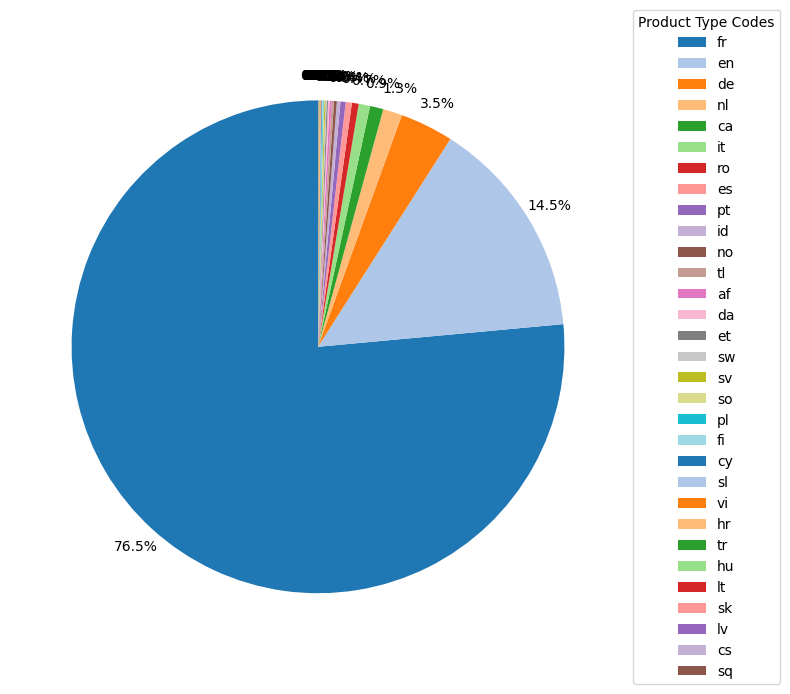

In [36]:
languages_counts = df['merged_langdetect'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    languages_counts,
    autopct='%1.1f%%',  # Display percentages
    startangle=90,
    colors=plt.cm.tab20.colors,  # Use colormap
    textprops={'fontsize': 10},  # Adjust font size for better readability
    pctdistance=1.1  # Move percentages outside the pie
)

# Add a legend outside the pie chart
ax.legend(
    wedges,
    languages_counts.index,  # Labels for the legend
    title="Product Type Codes",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # Position legend outside the chart
    fontsize=10
)
plt.show()

In [ ]:
# getting some number to evaluate localization strategies
not_french_characters = int(df.loc[~df['merged_langdetect'].isin(['fr'])]['merged_text'].str.len().sum())
not_english_characters = int(df.loc[~df['merged_langdetect'].isin(['en'])]['merged_text'].str.len().sum())
all_characters = int(df['merged_text'].str.len().sum())

DeepL_free_limit = 500000

print(f'If we look at the characters we see that {not_french_characters/all_characters:.2%}% are not classified as French')
print(f'If we look at the characters we see that {not_english_characters/all_characters:.2%} are not classified as English')

print(f'We have {not_french_characters:,} non French characters. Assuming that we use a free account of DeepL we would need {not_french_characters//DeepL_free_limit+1} accounts or months to localize everything into French')
print(f'We have {not_english_characters:,} non English characters. Assuming that we use a free account of DeepL we would need {not_english_characters//DeepL_free_limit+1} accounts or months to localize everything into English')

If we look at the characters we see that 7.68%% are not classified as French
If we look at the characters we see that 93.30% are not classified as English
We have 3,432,297 non French characters. Assuming that we use a free account of DeepL we would need 7 accounts or months to localize everything into French
We have 41,705,408 non English characters. Assuming that we use a free account of DeepL we would need 84 accounts or months to localize everything into English


If we look at the characters we see that 7.68%% are not classified as French
If we look at the characters we see that 93.30% are not classified as English
We have 3,432,297 non French characters. Assuming that we use a free account of DeepL we would need 7 accounts or months to localize everything into French
We have 41,705,408 non English characters. Assuming that we use a free account of DeepL we would need 84 accounts or months to localize everything into English


We can see that more than 3/4 of items are classifed as French, less than 15% as English and less 10% as any other language. These might however be wrong classification, it is very unlikly that we actually have Finnish, Afrikaans or even vietnamese in the data

In [57]:
#First lets have a look at what kind of data we are dealing with. We want to see how many have a description
int(df.loc[~df['merged_langdetect'].isin(['fr','en','de'])]['description'].isna().sum())/df.loc[~df['merged_langdetect'].isin(['fr','en','de'])]['description'].shape[0]
# We can see that most of these cases do not have a description so the classifier has less data to work with

0.03003834682573498

In [58]:
# Taking a look at the first 30 Dutch and Afrikaans results we see that we have a one Dutch result. "Smilla's Gevoel Voor Sneeuw"  The rest could be French.
df.loc[df['merged_langdetect'].isin(['nl','af'])].head(30)

,designation,description,productid,imageid,prdtypecode,designation_cleaned,description_cleaned,designation_org_clean,designation_spaces,designation_upper,...,description_encoding_issue,description_control_chars,bool_description,designation_empty,description_empty,identical_original,identical_cleaned,text_merged,merged_text,merged_langdetect
74,Lot 3 Livres Partitions - Hector L'apprenti Mu...,,1989328275,1118919143,2403,Lot 3 Livres Partitions - Hector L'apprenti Mu...,,True,False,False,...,False,False,1,False,False,False,False,Lot 3 Livres Partitions - Hector L'apprenti Mu...,Lot 3 Livres Partitions - Hector L'apprenti Mu...,nl
122,Tennis Magazine - Lot De Revues,,223805274,957104790,2403,Tennis Magazine - Lot De Revues,,True,False,False,...,False,False,1,False,False,False,False,Tennis Magazine - Lot De Revues //,Tennis Magazine - Lot De Revues,nl
240,Pokemon - Tentacool Createur De Legende 66/92,50PV.,50048695,436947892,1160,Pokemon - Tentacool Createur De Legende 66/92,50PV.,True,False,False,...,False,False,1,False,False,False,False,Pokemon - Tentacool Createur De Legende 66/92 ...,Pokemon - Tentacool Createur De Legende 66/925...,nl
245,Housse De Coussin D Allaitement Form-Fix,,209370105,947206925,1320,Housse De Coussin D Allaitement Form-Fix,,True,False,False,...,False,False,1,False,False,False,False,Housse De Coussin D Allaitement Form-Fix //,Housse De Coussin D Allaitement Form-Fix,nl
372,Le Barbier De Seville Suivi De Le Mariage De F...,,94111818,875804149,10,Le Barbier De Seville Suivi De Le Mariage De F...,,True,False,False,...,False,False,1,False,False,False,False,Le Barbier De Seville Suivi De Le Mariage De F...,Le Barbier De Seville Suivi De Le Mariage De F...,nl
433,Boîte De Rangement De Jeux Nintendo Nes,Boîte pour 10 jeux Nintendo Nes,1328361132,1074169757,50,Boîte De Rangement De Jeux Nintendo Nes,Boîte pour 10 jeux Nintendo Nes,True,False,False,...,False,False,1,False,False,False,False,Boîte De Rangement De Jeux Nintendo Nes // Boî...,Boîte De Rangement De Jeux Nintendo NesBoîte p...,nl
490,Bulletin De La Societe Des Agriculteurs De Fra...,,570708381,1027323287,2280,Bulletin De La Societe Des Agriculteurs De Fra...,,True,False,False,...,False,False,1,False,False,False,False,Bulletin De La Societe Des Agriculteurs De Fra...,Bulletin De La Societe Des Agriculteurs De Fra...,nl
549,Lot 10 Volume Des Livre De Cuisine De A À Z,,3882288842,1257675115,2403,Lot 10 Volume Des Livre De Cuisine De A À Z,,True,False,False,...,False,False,1,False,False,False,False,Lot 10 Volume Des Livre De Cuisine De A À Z //,Lot 10 Volume Des Livre De Cuisine De A À Z,nl
571,Collier - Zelda - Charm Windwaker,,3067343427,1188546157,1140,Collier - Zelda - Charm Windwaker,,True,False,False,...,False,False,1,False,False,False,False,Collier - Zelda - Charm Windwaker //,Collier - Zelda - Charm Windwaker,nl
615,Lot De 2 Sucettes Dentition Et De Gencives Ros...,,148595254,903979118,1320,Lot De 2 Sucettes Dentition Et De Gencives Ros...,,True,False,False,...,False,False,1,False,False,False,False,Lot De 2 Sucettes Dentition Et De Gencives Ros...,Lot De 2 Sucettes Dentition Et De Gencives Ros...,nl


In [68]:
# Taking a look at the first 30 German results we can see that most of them are misclassified and are in fact French
df.loc[df['merged_langdetect'].isin(['de'])].head(30)

,designation,description,productid,imageid,prdtypecode,designation_cleaned,description_cleaned,designation_org_clean,designation_spaces,designation_upper,...,description_encoding_issue,description_control_chars,bool_description,designation_empty,description_empty,identical_original,identical_cleaned,text_merged,merged_text,merged_langdetect
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,,True,False,False,...,False,False,1,False,False,False,False,Olivia: Personalisiertes Notizbuch / 150 Seite...,Olivia: Personalisiertes Notizbuch / 150 Seite...,de
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,,True,False,False,...,False,False,1,False,False,False,False,Peluche Donald - Europe - Disneyland 2000 (Mar...,Peluche Donald - Europe - Disneyland 2000 (Mar...,de
6,Christof E: Bildungsprozessen Auf Der Spur,,91920807,907794536,10,Christof E: Bildungsprozessen Auf Der Spur,,True,False,False,...,False,False,1,False,False,False,False,Christof E: Bildungsprozessen Auf Der Spur //,Christof E: Bildungsprozessen Auf Der Spur,de
21,Glitter Beach Barbie By Barbie,Original Barbie Doll. Contains glitter lotion..,3228900895,1199384348,1280,Glitter Beach Barbie By Barbie,Original Barbie Doll. Contains glitter lotion..,True,False,False,...,False,False,1,False,False,False,False,Glitter Beach Barbie By Barbie // Original Bar...,Glitter Beach Barbie By BarbieOriginal Barbie ...,de
48,Dragon Ball Z - Serie 3 - 13 - Francaise,,73334276,844838682,1160,Dragon Ball Z - Serie 3 - 13 - Francaise,,True,False,False,...,False,False,1,False,False,False,False,Dragon Ball Z - Serie 3 - 13 - Francaise //,Dragon Ball Z - Serie 3 - 13 - Francaise,de
110,Figurine Zhu Zhu Pets - Zhu Zhu Pet Dans Son P...,,388467753,1003036081,1140,Figurine Zhu Zhu Pets - Zhu Zhu Pet Dans Son P...,,True,False,False,...,False,False,1,False,False,False,False,Figurine Zhu Zhu Pets - Zhu Zhu Pet Dans Son P...,Figurine Zhu Zhu Pets - Zhu Zhu Pet Dans Son P...,de
131,Dr. Mercurius' Heilsame Reise Zum Planeten Erde,,1807806498,1204663650,10,Dr. Mercurius' Heilsame Reise Zum Planeten Erde,,True,False,False,...,False,False,1,False,False,False,False,Dr. Mercurius' Heilsame Reise Zum Planeten Erd...,Dr. Mercurius' Heilsame Reise Zum Planeten Erde,de
143,Coffre À Jouet En Osier Gris,,2932591602,1173879377,1320,Coffre À Jouet En Osier Gris,,True,False,False,...,False,False,1,False,False,False,False,Coffre À Jouet En Osier Gris //,Coffre À Jouet En Osier Gris,de
163,Fauteuil De Bureau Gaming Swift Noir Et Rouge,,2792163142,1172463223,50,Fauteuil De Bureau Gaming Swift Noir Et Rouge,,True,False,False,...,False,False,1,False,False,False,False,Fauteuil De Bureau Gaming Swift Noir Et Rouge //,Fauteuil De Bureau Gaming Swift Noir Et Rouge,de
277,Figurine En Résine 120 Mm Swat 3 Mm128-Sol,,2587938353,1151689349,1300,Figurine En Résine 120 Mm Swat 3 Mm128-Sol,,True,False,False,...,False,False,1,False,False,False,False,Figurine En Résine 120 Mm Swat 3 Mm128-Sol //,Figurine En Résine 120 Mm Swat 3 Mm128-Sol,de


In [ ]:
df_lang.to_csv("language_analysis/df_langdetect.csv", index=True)

In [3]:
df_lang = pd.read_csv("language_analysis/df_langdetect.csv")

/tmp/ipykernel_57461/1050273457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df, palette="Greens")


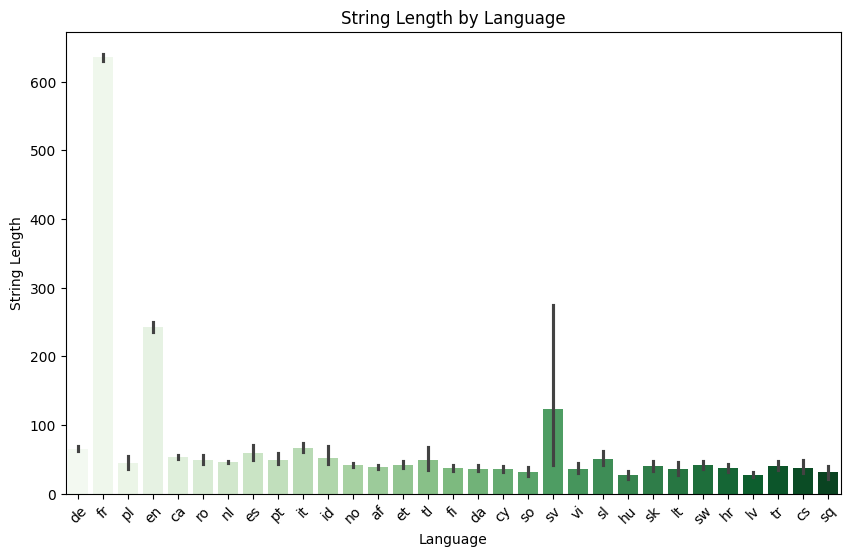

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df, palette="Greens")
plt.xlabel("Language")
plt.ylabel("String Length")
plt.title("String Length by Language")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_57461/3334131119.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df, palette="Greens")


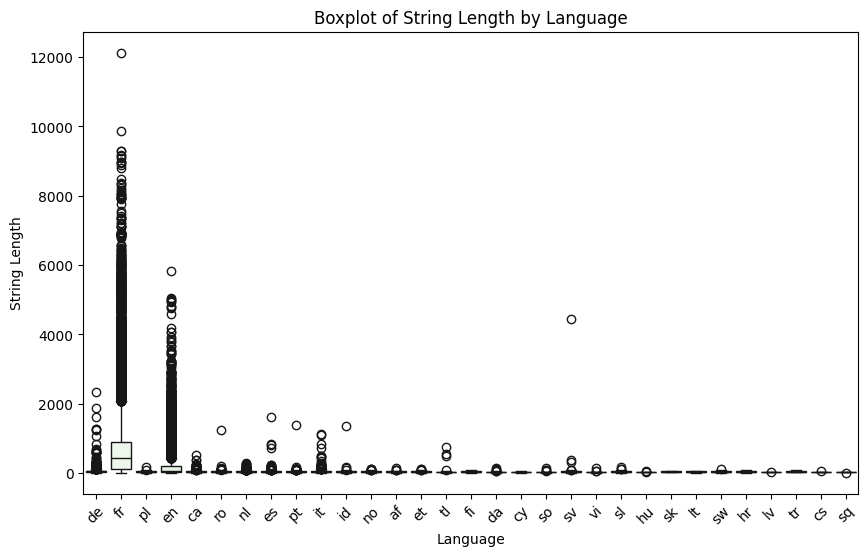

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df, palette="Greens")
plt.xlabel("Language")
plt.ylabel("String Length")
plt.title("Boxplot of String Length by Language")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_57461/1055143102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df[~df['merged_langdetect'].isin(['fr'])], palette="Greens")


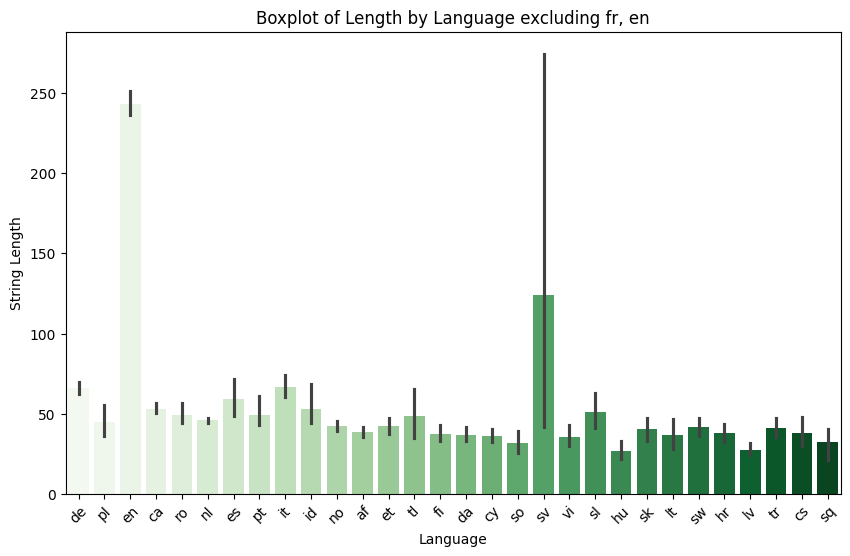

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df[~df['merged_langdetect'].isin(['fr'])], palette="Greens")
plt.xlabel("Language")
plt.ylabel("String Length")
plt.title("Boxplot of Length by Language excluding fr, en")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_57461/942572218.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df[~df['merged_langdetect'].isin(['fr', 'en'])], palette="Greens")


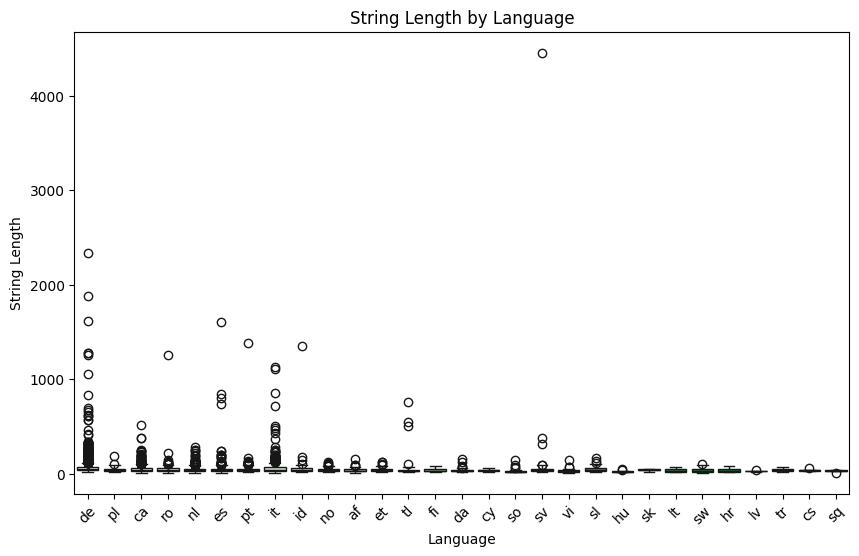

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df[~df['merged_langdetect'].isin(['fr', 'en'])], palette="Greens")
plt.xlabel("Language")
plt.ylabel("String Length")
plt.title("String Length by Language")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_57461/1164712650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="merged_langdetect",  y=df['merged_text'].apply(len), data=df[df['merged_langdetect'].isin(['nl'])], palette="Greens")


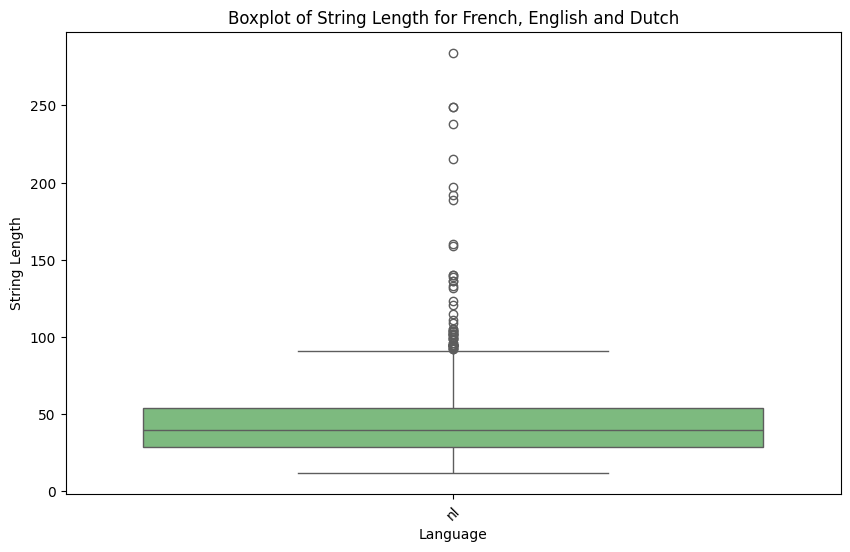

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="merged_langdetect",  y=df['merged_text'].apply(len), data=df[df['merged_langdetect'].isin(['nl'])], palette="Greens")
plt.xlabel("Language")
plt.ylabel("String Length")
plt.title("Boxplot of String Length for French, English and Dutch")
plt.xticks(rotation=45)
plt.show();

In [80]:
freq_counts = pd.crosstab(df['prdtypecode'], df['merged_langdetect'].apply(lambda x: x if x in ['en','fr'] else 'other'), normalize=True)
freq_counts

merged_langdetect,en,fr,other
prdtypecode,,,
10,0.012648,0.017959,0.006088
40,0.011753,0.013001,0.004781
50,0.003462,0.014461,0.001872
60,0.001154,0.008208,0.000436
1140,0.012318,0.011494,0.007643
1160,0.015827,0.017453,0.013272
1180,0.003392,0.004051,0.001554
1280,0.011847,0.041135,0.004369
1281,0.005806,0.017193,0.001378


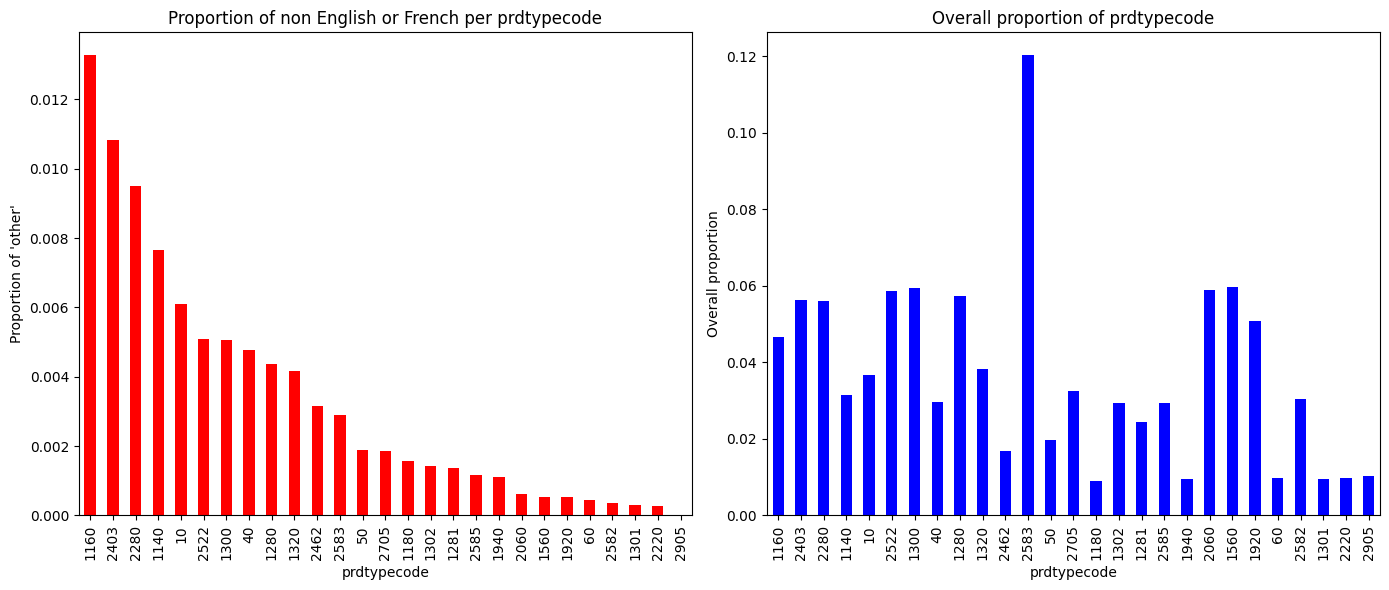

<Figure size 640x480 with 0 Axes>

In [82]:
# Compute "other" proportion per prdtypecode
other_freq = freq_counts['other'].sort_values(ascending=False)

# Compute overall proportion of each prdtypecode
overall_freq = df['prdtypecode'].value_counts(normalize=True)

# Reindex `overall_freq` to match the order of `other_freq`
overall_freq = overall_freq.reindex(other_freq.index, fill_value=0)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Plot proportion of "other" per prdtypecode
other_freq.plot(kind="bar", color="red", ax=axes[0])
axes[0].set_title("Proportion of non English or French per prdtypecode")
axes[0].set_xlabel("prdtypecode")
axes[0].set_ylabel("Proportion of 'other'")

# Plot overall proportion of each prdtypecode (same order)
overall_freq.plot(kind="bar", color="blue", ax=axes[1])
axes[1].set_title("Overall proportion of prdtypecode")
axes[1].set_xlabel("prdtypecode")
axes[1].set_ylabel("Overall proportion")

# Adjust layout
plt.tight_layout()
plt.show()
# Adjust layout
plt.tight_layout()
plt.show();
#Note that the scale of the two graphs is not the same and that the right scale is the proportion of elements that are non French or English classified 
#while the right are the distribution of entries across categories  

In [87]:
df['text_length'] = (df['merged_text'].fillna('')).apply(len)

In [88]:
df.loc[df['merged_langdetect'] == 'nl'].sort_values(by="text_length", ascending=False)

,designation,description,productid,imageid,prdtypecode,designation_cleaned,description_cleaned,designation_org_clean,designation_spaces,designation_upper,...,description_control_chars,bool_description,designation_empty,description_empty,identical_original,identical_cleaned,text_merged,merged_text,merged_langdetect,text_length
71223,Cycle Janacek - Z Mrtveho Domu De La Maison De...,DIRECTION MUSICALE: SIR CHARLES MACKERRAS / JO...,1155724904,1065884085,10,Cycle Janacek - Z Mrtveho Domu De La Maison De...,DIRECTION MUSICALE: SIR CHARLES MACKERRAS / JO...,False,True,False,...,False,1,False,False,False,False,Cycle Janacek - Z Mrtveho Domu De La Maison De...,Cycle Janacek - Z Mrtveho Domu De La Maison De...,nl,284
30629,Nouvelliste (Le) N° 145 Du 22/06/1944 - De Vif...,,435076331,1007691597,2280,Nouvelliste (Le) N° 145 Du 22/06/1944 - De Vif...,,False,True,False,...,False,1,False,False,False,False,Nouvelliste (Le) N° 145 Du 22/06/1944 - De Vif...,Nouvelliste (Le) N° 145 Du 22/06/1944 - De Vif...,nl,249
73975,Parisien (Le) N° 19780 Du 10/04/2008 - Jugee P...,,570615441,1027224429,2280,Parisien (Le) N° 19780 Du 10/04/2008 - Jugee P...,,False,True,False,...,False,1,False,False,False,False,Parisien (Le) N° 19780 Du 10/04/2008 - Jugee P...,Parisien (Le) N° 19780 Du 10/04/2008 - Jugee P...,nl,249
18383,Comoedia N° 2021 Du 14/04/1913 - Sur Mes Chemi...,,569540086,1026776046,2280,Comoedia N° 2021 Du 14/04/1913 - Sur Mes Chemi...,,False,True,False,...,False,1,False,False,False,False,Comoedia N° 2021 Du 14/04/1913 - Sur Mes Chemi...,Comoedia N° 2021 Du 14/04/1913 - Sur Mes Chemi...,nl,238
490,Bulletin De La Societe Des Agriculteurs De Fra...,,570708381,1027323287,2280,Bulletin De La Societe Des Agriculteurs De Fra...,,True,False,False,...,False,1,False,False,False,False,Bulletin De La Societe Des Agriculteurs De Fra...,Bulletin De La Societe Des Agriculteurs De Fra...,nl,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52380,Lot De 14 Lire,,414927744,1005638553,2403,Lot De 14 Lire,,True,False,False,...,False,1,False,False,False,False,Lot De 14 Lire //,Lot De 14 Lire,nl,14
66345,Lot Jeu De Wii,,2955165880,1176333160,2462,Lot Jeu De Wii,,True,False,False,...,False,1,False,False,False,False,Lot Jeu De Wii //,Lot Jeu De Wii,nl,14
6117,Jeu De L'an 2,,58876193,710287379,1281,Jeu De L'an 2,,True,False,False,...,False,1,False,False,False,False,Jeu De L'an 2 //,Jeu De L'an 2,nl,13
19932,Lot De 12 Bd,,2739718595,1161560611,2403,Lot De 12 Bd,,True,False,False,...,False,1,False,False,False,False,Lot De 12 Bd //,Lot De 12 Bd,nl,12


In [17]:
df_lang.loc[df_lang['merged_langdetect'] == 'nl'].sort_values(by="description", ascending=False).head(20)

,Unnamed: 0,designation,description,productid,imageid,prdtypecode,merged_langdetect,description_langdetect,designation_langdetect,text_length
8568,8568,Cowboy Bebop Keyart Binder,pCowboy Bebop Keyart Binderp,3287148412,1204209195,1280,nl,nl,tr,54
38458,38458,Hurleur De Tzeen En Metal,hurleur de tzeen en metal peint avec soins,3198737540,1196912776,1280,nl,fr,nl,67
24443,24443,Carte Yu-Gi-Oh Lval-Fr081 Mikorange Sylvan Neu...,carte YU-GI-OH LVAL-FR081 Mikorange Sylvan NEU...,423099009,1006332075,1160,nl,no,nl,100
71794,71794,Carte Yu-Gi-Oh Bp03-Fr178 Appel De L'atlantide...,carte YU-GI-OH BP03-FR178 Appel De L'atlantide...,933418747,1047849550,1160,nl,ca,nl,108
35043,35043,3 Volants Badmington Sachet,VOLANTS : 3 volants. Dès 8 ans.,1928354864,1113778896,1302,nl,ca,nl,58
11340,11340,Mon Voisin Totoro- Perler Hama,Totoro en perle,565585941,1026559164,1140,nl,es,en,45
82309,82309,Toogood Biscuits Aperitifs Le Veggie 85g,Toogood biscuits aperitifs Le Veggie 85g - Ton...,4008123008,1275716423,1940,nl,nl,nl,141
49292,49292,Tapis De Jeu Wild Life,Tapis de jeu Wild Life,4196123914,1312797163,1180,nl,fr,nl,44
60407,60407,Trousse Carré Wheels - 33716,TROUSSE TUBE,2803589804,1165420780,2522,nl,vi,fr,40
60683,60683,Snack Volaille - Lot De 10,Snack volaille,3798830873,1246406854,2220,nl,fi,nl,40
